# Exploratory Data Analysis (EDA)
## Student Performance Dataset

### Objective
The objective of this project is to perform Exploratory Data Analysis on the Student Performance Dataset to understand the factors affecting students' academic performance through data cleaning, visualization, and meaningful insights.


Code Cell: Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

Code Cell: Load Dataset

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Code Cell: Understand the Dataset

In [3]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Markdown Cell: Dataset Description

### Dataset Description
The dataset contains information about students' academic performance along with demographic and socio-economic factors such as gender, parental education, lunch type, and test preparation course.

Code Cell: Data Cleaning

Rename Columns

In [7]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

Check Duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df = df.drop_duplicates()

Final Check

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Data Visualization (6 Visualizations)

Visualization 1: Gender Distribution

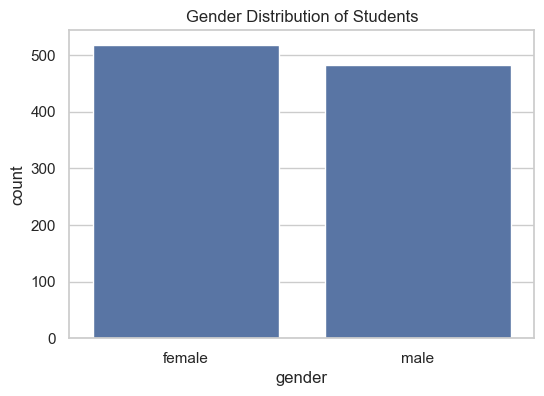

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x="gender", data=df)
plt.title("Gender Distribution of Students")
plt.show()

Visualization 2: Math Score Distribution

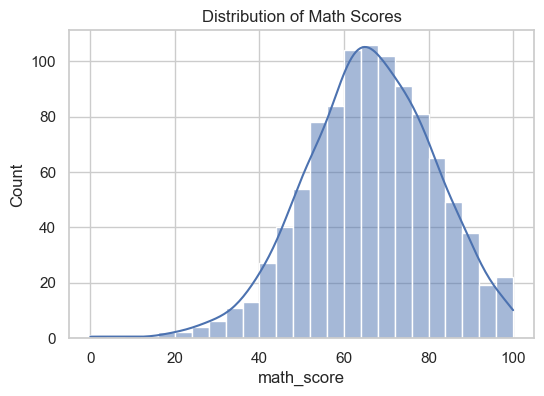

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df["math_score"], kde=True)
plt.title("Distribution of Math Scores")
plt.show()

Visualization 3: Scores by Gender

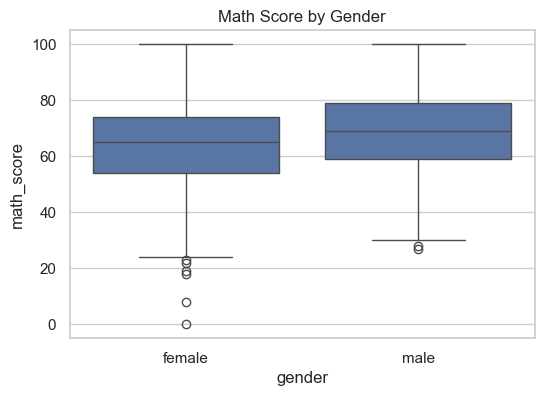

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x="gender", y="math_score", data=df)
plt.title("Math Score by Gender")
plt.show()

Visualization 4: Test Preparation Impact

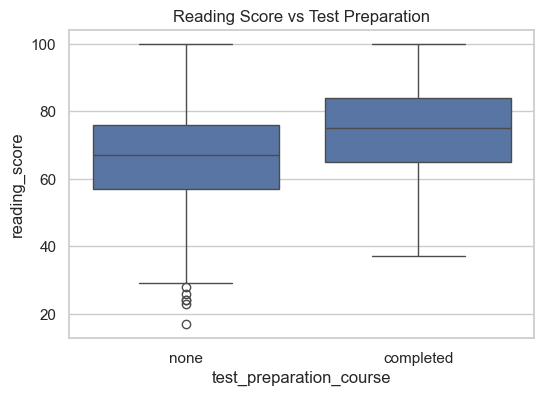

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x="test_preparation_course", y="reading_score", data=df)
plt.title("Reading Score vs Test Preparation")
plt.show()

Visualization 5: Parental Education vs Average Score

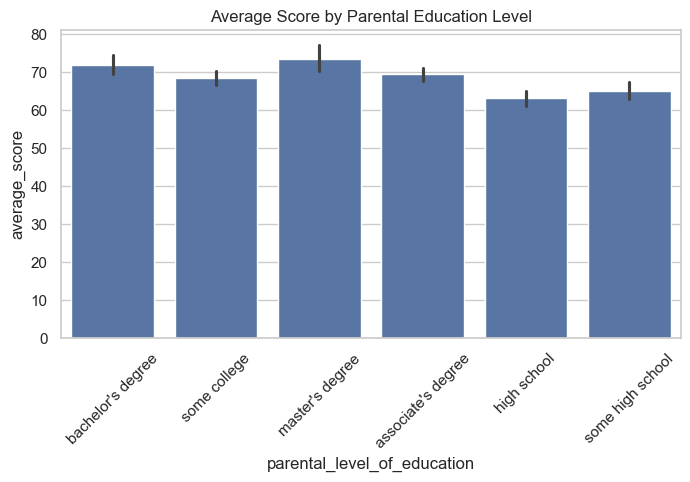

In [15]:
df["average_score"] = df[["math_score","reading_score","writing_score"]].mean(axis=1)

plt.figure(figsize=(8,4))
sns.barplot(x="parental_level_of_education", y="average_score", data=df)
plt.xticks(rotation=45)
plt.title("Average Score by Parental Education Level")
plt.show()

Visualization 6: Correlation Heatmap

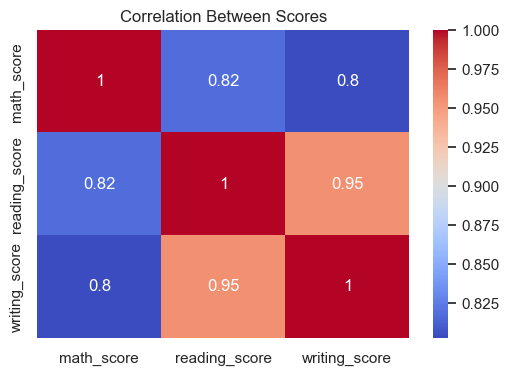

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["math_score","reading_score","writing_score"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Between Scores")
plt.show()

Analysis

Code Cell: Grouped Analysis

In [17]:
df.groupby("test_preparation_course")[["math_score","reading_score","writing_score"]].mean()

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [18]:
df.groupby("gender")["average_score"].mean()

gender
female    69.569498
male      65.837483
Name: average_score, dtype: float64

Insights

### Key Insights

1. Students who completed the test preparation course scored higher on average across all subjects.
2. Reading and writing scores show a strong positive correlation, indicating related skill sets.
3. Parental level of education has a noticeable impact on students' average performance.
4. Female students tend to perform slightly better in reading and writing, while male students perform better in math.
5. Students receiving standard lunch generally score higher than those receiving free/reduced lunch.


Conclusion

### Conclusion
The exploratory data analysis revealed that socio-economic and academic preparation factors significantly influence student performance. The cleaned dataset and insights gained can be used for predictive modeling or further educational research.
